In [1]:
import pandas as pd
import pyodbc
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plot

C:\Users\Will\AppData\Local\Temp\ipykernel_20296\1718355986.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sales_conn = sqlite3.connect("../week 2/go_sales.sqlite")

order_details  = pd.read_sql("SELECT * FROM order_details", sales_conn)
returned_item = pd.read_sql("SELECT * FROM returned_item", sales_conn)
product = pd.read_sql("SELECT * FROM product", sales_conn)
product_type = pd.read_sql("SELECT * FROM product_type", sales_conn)
product_line = pd.read_sql("SELECT * FROM product_line", sales_conn)
order_method = pd.read_sql("SELECT * FROM order_method", sales_conn)
order_header = pd.read_sql("SELECT * FROM order_header", sales_conn)
retailer_site = pd.read_sql("SELECT * FROM retailer_site", sales_conn)

order_returned = pd.merge(order_details, returned_item, on='ORDER_DETAIL_CODE')
order_returned_product = pd.merge(order_returned, product, on='PRODUCT_NUMBER')
order_returned_product_type = pd.merge(order_returned_product, product_type, on='PRODUCT_TYPE_CODE')
orderline = pd.merge(order_returned_product_type, product_line, on='PRODUCT_LINE_CODE', suffixes=('_left', '_right'))
order_line_method = pd.merge(orderline, order_header, on= 'ORDER_NUMBER')
merged = pd.merge(order_line_method, order_method, on='ORDER_METHOD_CODE')

merged

,ORDER_DETAIL_CODE,ORDER_NUMBER,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,TRIAL879,RETURN_CODE,RETURN_DATE,...,RETAILER_NAME,RETAILER_SITE_CODE,RETAILER_CONTACT_CODE,SALES_STAFF_CODE,SALES_BRANCH_CODE,ORDER_DATE,ORDER_METHOD_CODE,TRIAL885,ORDER_METHOD_EN,TRIAL888
0,100146,8465,15,16,504.54,756.82,593.5,T,1975,9-8-2021 18:45:17,...,Naranco de Bulnes,327,312,94,29,2021-07-26,2,T,Telephone,T
1,100149,9116,16,64,1.02,2.05,2.05,T,1976,6-7-2021 13:34:59,...,Naranco de Bulnes,330,315,95,29,2021-06-28,1,T,Fax,T
2,100199,9113,30,22,6.78,13.57,13.57,T,1979,6-7-2021 07:19:36,...,Naranco de Bulnes,327,312,94,29,2021-06-25,5,T,Web,T
3,100250,9254,43,52,126.51,189.77,189.77,T,2298,14-12-2021 11:28:50,...,Naranco de Bulnes,327,312,94,29,2021-10-23,5,T,Web,T
4,100641,9269,111,6,81.87,180.13,180.13,T,2301,19-12-2021 04:10:53,...,Ocio y Aventura,331,316,94,29,2021-12-03,7,T,Sales visit,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,99739,9250,15,16,554.59,831.88,626.94,T,1974,9-11-2020 13:32:27,...,Naranco de Bulnes,326,311,94,29,2020-10-16,7,T,Sales visit,T
702,99746,8444,17,34,64.36,90.09,90.09,T,1977,18-8-2020 19:48:51,...,Naranco de Bulnes,329,314,94,29,2020-08-01,2,T,Telephone,T
703,99807,8440,33,70,19.62,29.44,29.44,T,1980,22-11-2020 13:33:29,...,Naranco de Bulnes,326,311,95,29,2020-09-27,7,T,Sales visit,T
704,99810,9251,34,54,32.02,51.24,51.24,T,1981,17-10-2020 19:48:21,...,Naranco de Bulnes,329,314,94,29,2020-10-06,4,T,E-mail,T


In [3]:
df = merged.loc[:, ['ORDER_METHOD_EN', 'PRODUCT_LINE_EN', 'QUANTITY', 'RETURN_QUANTITY', 'RETURN_REASON_CODE']]
df

#afhankelijke variabele: RETURN_REASON_CODE onafhankelijke variabelen: PRODUCT_NUMBER, QUANTITY, UNIT_PRICE, UNIT_SALE_PRICE, 

,ORDER_METHOD_EN,PRODUCT_LINE_EN,QUANTITY,RETURN_QUANTITY,RETURN_REASON_CODE
0,Telephone,Camping Equipment,16,16,4
1,Fax,Camping Equipment,64,64,5
2,Web,Camping Equipment,22,22,4
3,Web,Mountaineering Equipment,52,6,1
4,Sales visit,Golf Equipment,6,6,4
...,...,...,...,...,...
701,Sales visit,Camping Equipment,16,2,1
702,Telephone,Camping Equipment,34,2,1
703,Sales visit,Camping Equipment,70,6,1
704,E-mail,Camping Equipment,54,54,3


In [4]:
dummies_df_method = pd.get_dummies(df.loc[:, ['ORDER_METHOD_EN']])
dummies_df_product_line = pd.get_dummies(df.loc[:, ['PRODUCT_LINE_EN']])

In [5]:
df = pd.concat([df, dummies_df_method, dummies_df_product_line], axis = 1)
df = df.drop(['ORDER_METHOD_EN'], axis = 1)
df = df.drop(['PRODUCT_LINE_EN'], axis = 1)
df

,QUANTITY,RETURN_QUANTITY,RETURN_REASON_CODE,ORDER_METHOD_EN_E-mail,ORDER_METHOD_EN_Fax,ORDER_METHOD_EN_Mail,ORDER_METHOD_EN_Sales visit,ORDER_METHOD_EN_Special,ORDER_METHOD_EN_Telephone,ORDER_METHOD_EN_Web,PRODUCT_LINE_EN_Camping Equipment,PRODUCT_LINE_EN_Golf Equipment,PRODUCT_LINE_EN_Mountaineering Equipment,PRODUCT_LINE_EN_Outdoor Protection,PRODUCT_LINE_EN_Personal Accessories
0,16,16,4,False,False,False,False,False,True,False,True,False,False,False,False
1,64,64,5,False,True,False,False,False,False,False,True,False,False,False,False
2,22,22,4,False,False,False,False,False,False,True,True,False,False,False,False
3,52,6,1,False,False,False,False,False,False,True,False,False,True,False,False
4,6,6,4,False,False,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,16,2,1,False,False,False,True,False,False,False,True,False,False,False,False
702,34,2,1,False,False,False,False,False,True,False,True,False,False,False,False
703,70,6,1,False,False,False,True,False,False,False,True,False,False,False,False
704,54,54,3,True,False,False,False,False,False,False,True,False,False,False,False


In [6]:
x = df.drop('RETURN_REASON_CODE', axis = 1)
y = df.loc[:, ['RETURN_REASON_CODE']]
x

,QUANTITY,RETURN_QUANTITY,ORDER_METHOD_EN_E-mail,ORDER_METHOD_EN_Fax,ORDER_METHOD_EN_Mail,ORDER_METHOD_EN_Sales visit,ORDER_METHOD_EN_Special,ORDER_METHOD_EN_Telephone,ORDER_METHOD_EN_Web,PRODUCT_LINE_EN_Camping Equipment,PRODUCT_LINE_EN_Golf Equipment,PRODUCT_LINE_EN_Mountaineering Equipment,PRODUCT_LINE_EN_Outdoor Protection,PRODUCT_LINE_EN_Personal Accessories
0,16,16,False,False,False,False,False,True,False,True,False,False,False,False
1,64,64,False,True,False,False,False,False,False,True,False,False,False,False
2,22,22,False,False,False,False,False,False,True,True,False,False,False,False
3,52,6,False,False,False,False,False,False,True,False,False,True,False,False
4,6,6,False,False,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,16,2,False,False,False,True,False,False,False,True,False,False,False,False
702,34,2,False,False,False,False,False,True,False,True,False,False,False,False
703,70,6,False,False,False,True,False,False,False,True,False,False,False,False
704,54,54,True,False,False,False,False,False,False,True,False,False,False,False


In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.15,
    random_state=42
)

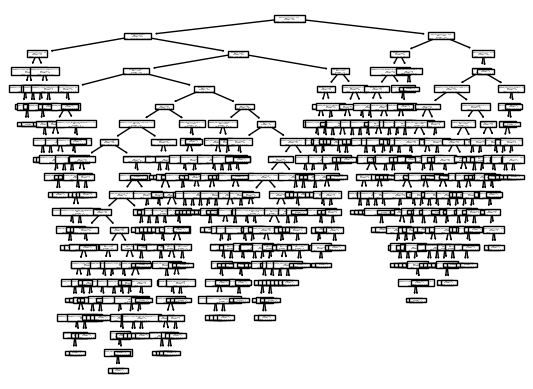

In [8]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree, feature_names = x.columns)
plot.show()

In [9]:
predict_df = pd.DataFrame(dtree.predict(x_test))
predict_df = predict_df.rename(columns={0:'Predicted_reason'})
results_frame = pd.concat([y_test.reset_index()['RETURN_REASON_CODE'], predict_df], axis = 1)
results_frame


,RETURN_REASON_CODE,Predicted_reason
0,1,1
1,1,1
2,1,2
3,1,1
4,1,2
...,...,...
101,2,1
102,4,3
103,1,1
104,5,4


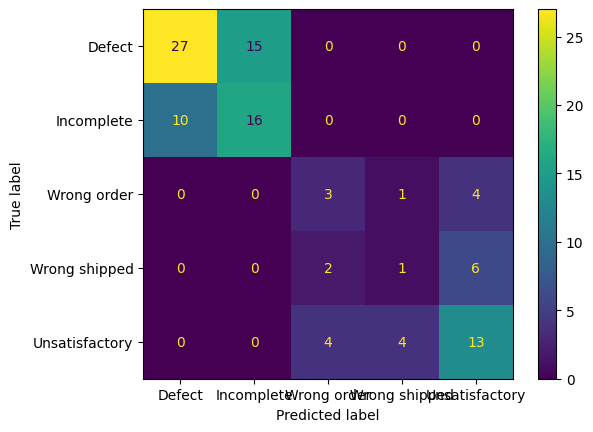

In [10]:
confusion_matrix = metrics.confusion_matrix(results_frame['RETURN_REASON_CODE'], results_frame['Predicted_reason'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Defect", "Incomplete", "Wrong order", "Wrong shipped", "Unsatisfactory"])

cm_display.plot()
plot.show()

In [11]:
metrics.accuracy_score(results_frame['RETURN_REASON_CODE'], results_frame['Predicted_reason'])

0.5660377358490566